In [158]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import wordcloud
import string
from collections import Counter
from datetime import date

In [2]:
client = pymongo.MongoClient('localhost',27017)
scrapy= client['scrapynew']
stackoverflow = scrapy['stackoverflow']
data = pd.DataFrame(stackoverflow.find())

In [3]:
#The loading data
#data.to_csv('Stackoverflowpython.csv')
data

,_id,questions,votes,answers,views,links,questionsbody,questionstag,questionstime
0,question-summary-231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[/questions/231767/what-does-the-yield-keyword...,[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,question-summary-394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[/questions/394809/does-python-have-a-ternary-...,[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,question-summary-419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[/questions/419163/what-does-if-name-main-do],[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,question-summary-100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[/questions/100003/what-are-metaclasses-in-pyt...,[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,question-summary-82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[/questions/82831/how-do-i-check-whether-a-fil...,[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...,...
1305232,question-summary-39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[/questions/39337756/why-python-scope-my-varia...,[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,question-summary-39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],[/questions/39077499/python-take-value-of-a-li...,"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,question-summary-38818484,[Python Installing issu],[-7],[1],[61 views],[/questions/38818484/python-installing-issu],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,question-summary-38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[/questions/38639217/python-indexerror-list-in...,[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [4]:
#part of data cleaning and processing
df3 = data.rename(columns = {'_id':'id'}) 

In [5]:
#afraid that may still have duplicate data
df=df3.drop_duplicates(subset='id', keep='last', inplace=False)
#we don't use links now
del df['links']

In [6]:
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,question-summary-231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,question-summary-394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,question-summary-419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,question-summary-100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,question-summary-82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...
1305232,question-summary-39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,question-summary-39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,question-summary-38818484,[Python Installing issu],[-7],[1],[61 views],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,question-summary-38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [7]:
df['id']=df['id'].str.slice(17,)
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,[What does the “yield” keyword do?],[9712],[38],"[2,122,124 views]",[\r\n What is the use of the yield ...,[tags t-python t-iterator t-generator t-yield ...,[2008-10-23 22:21:11Z]
1,394809,[Does Python have a ternary conditional operat...,[5639],[23],"[1,806,936 views]",[\r\n If Python does not have a ter...,[tags t-python t-operators t-ternary-operator ...,[This post is community owned as of Jan 12 '13...
2,419163,[What does if __name__ == “__main__”: do?],[5597],[29],"[2,636,793 views]",[\r\n What does the if __name__ == ...,[tags t-python t-namespaces t-main t-python-mo...,[2009-01-07 04:11:00Z]
3,100003,[What are metaclasses in Python?],[5443],[16],"[753,627 views]",[\r\n What are metaclasses and what...,[tags t-python t-oop t-metaclass t-python-data...,[2008-09-19 06:10:46Z]
4,82831,[How do I check whether a file exists without ...,[5321],[37],"[3,732,357 views]",[\r\n How do I see if a file exists...,[tags t-python t-file t-file-exists],[2008-09-17 12:55:00Z]
...,...,...,...,...,...,...,...,...
1305232,39337756,[Why Python scope my variable outside my funct...,[-7],[1],[64 views],[\r\n i start with Python. I like t...,[tags t-python t-python-3ûx],[2016-09-05 21:13:26Z]
1305233,39077499,"[Python, take value of a list from an input]",[-7],[1],[61 views],"[\r\n Hi guys i'm Learning python, ...",[tags t-python],[2016-08-22 10:43:48Z]
1305234,38818484,[Python Installing issu],[-7],[1],[61 views],[\r\n I reinstalled it many times b...,[tags t-python t-installer],[2016-08-07 20:56:29Z]
1305235,38639217,[Python : IndexError: list index out of range],[-7],[1],[207 views],[\r\n I'm relatively new to python....,[tags t-python],[2016-07-28 14:22:44Z]


In [8]:
#df.votes = df.votes.apply(lambda x: x.replace('[]','')) remove the []
df.views = df.views.apply(lambda x: str(x).replace('[','').replace("]",""))
df.votes = df.votes.apply(lambda x: str(x).replace('[','').replace("]",""))
df.answers = df.answers.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionstag = df.questionstag.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionstime = df.questionstime.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questions = df.questions.apply(lambda x: str(x).replace('[','').replace("]",""))
df.questionsbody = df.questionsbody.apply(lambda x: str(x).replace('[','').replace("]",""))

In [9]:
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,'What does the “yield” keyword do?','9712','38',"'2,122,124 views'","""\r\n What is the use of the yield ...",'tags t-python t-iterator t-generator t-yield ...,'2008-10-23 22:21:11Z'
1,394809,'Does Python have a ternary conditional operat...,'5639','23',"'1,806,936 views'",'\r\n If Python does not have a ter...,'tags t-python t-operators t-ternary-operator ...,"""This post is community owned as of Jan 12 '13..."
2,419163,'What does if __name__ == “__main__”: do?','5597','29',"'2,636,793 views'",'\r\n What does the if __name__ == ...,'tags t-python t-namespaces t-main t-python-mo...,'2009-01-07 04:11:00Z'
3,100003,'What are metaclasses in Python?','5443','16',"'753,627 views'",'\r\n What are metaclasses and what...,'tags t-python t-oop t-metaclass t-python-data...,'2008-09-19 06:10:46Z'
4,82831,'How do I check whether a file exists without ...,'5321','37',"'3,732,357 views'",'\r\n How do I see if a file exists...,'tags t-python t-file t-file-exists','2008-09-17 12:55:00Z'
...,...,...,...,...,...,...,...,...
1305232,39337756,'Why Python scope my variable outside my funct...,'-7','1','64 views','\r\n i start with Python. I like t...,'tags t-python t-python-3ûx','2016-09-05 21:13:26Z'
1305233,39077499,"'Python, take value of a list from an input'",'-7','1','61 views',"'\r\n Hi guys i\'m Learning python,...",'tags t-python','2016-08-22 10:43:48Z'
1305234,38818484,'Python Installing issu','-7','1','61 views','\r\n I reinstalled it many times b...,'tags t-python t-installer','2016-08-07 20:56:29Z'
1305235,38639217,'Python : IndexError: list index out of range','-7','1','207 views',"""\r\n I'm relatively new to python....",'tags t-python','2016-07-28 14:22:44Z'


In [10]:
df.views = df.views.apply(lambda x: str(x).replace("'",""))
df.votes = df.votes.apply(lambda x: str(x).replace("'",""))
df.answers = df.answers.apply(lambda x: str(x).replace("'",""))
df.questions = df.questions.apply(lambda x: str(x).replace("'",""))
df.questionstag = df.questionstag.apply(lambda x: str(x).replace("'",""))
df.questionstime = df.questionstime.apply(lambda x: str(x).replace("'",""))
#df.dtypes

In [11]:
df['views']=df['views'].str.slice(0,-5)
df
#df.answers = df.answers.apply(lambda x: str(x).replace(",",""))
#df.views = df.views.str.replace(r',', '')

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,What does the “yield” keyword do?,9712,38,"2,122,124","""\r\n What is the use of the yield ...",tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,"1,806,936",'\r\n If Python does not have a ter...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,"2,636,793",'\r\n What does the if __name__ == ...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,"753,627",'\r\n What are metaclasses and what...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,"3,732,357",'\r\n How do I see if a file exists...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,'\r\n i start with Python. I like t...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"'\r\n Hi guys i\'m Learning python,...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61,'\r\n I reinstalled it many times b...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,"""\r\n I'm relatively new to python....",tags t-python,2016-07-28 14:22:44Z


In [12]:
#remove the "," in views
df.views = df.views.apply(lambda x: str(x).replace(",",""))
df

,id,questions,votes,answers,views,questionsbody,questionstag,questionstime
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,'\r\n i start with Python. I like t...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"'\r\n Hi guys i\'m Learning python,...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61,'\r\n I reinstalled it many times b...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,"""\r\n I'm relatively new to python....",tags t-python,2016-07-28 14:22:44Z


In [13]:
#change some columns to number
df['id'] = pd.to_numeric(df['id']) 
df['votes'] = pd.to_numeric(df['votes']) 
df['answers'] = pd.to_numeric(df['answers']) 
df['views'] = pd.to_numeric(df['views']) 

In [14]:
df = df.rename(columns = {'questionstime':'date'}) 
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",tags t-python t-iterator t-generator t-yield t...,2008-10-23 22:21:11Z
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,tags t-python t-operators t-ternary-operator t...,"""This post is community owned as of Jan 12 13 ..."
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,tags t-python t-namespaces t-main t-python-mod...,2009-01-07 04:11:00Z
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,tags t-python t-oop t-metaclass t-python-datam...,2008-09-19 06:10:46Z
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,tags t-python t-file t-file-exists,2008-09-17 12:55:00Z
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,'\r\n i start with Python. I like t...,tags t-python t-python-3ûx,2016-09-05 21:13:26Z
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"'\r\n Hi guys i\'m Learning python,...",tags t-python,2016-08-22 10:43:48Z
1305234,38818484,Python Installing issu,-7,1,61,'\r\n I reinstalled it many times b...,tags t-python t-installer,2016-08-07 20:56:29Z
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,"""\r\n I'm relatively new to python....",tags t-python,2016-07-28 14:22:44Z


In [15]:
#I don't know why the second row's time was so strange maybe the website set it.
#this kinds about 1k questions in date related analyse we drop it.
df['date']=df['date'].str.slice(0,10)
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

In [16]:
dfdate=df.dropna(subset=['date'])
dfdate=dfdate.sort_values(by = 'date')
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date
10329,469,How can I find the full path to a font from it...,39,4,2869,"""\r\n I am using the Photoshop's ja...",tags t-python t-macos t-fonts t-photoshop,2008-08-02
5344,337,XML Processing in Python closed,68,12,7926,"""\r\n I am about to build a piece o...",tags t-python t-xml,2008-08-02
9782,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,'\r\n I have a cross-platform (Pyth...,tags t-python t-windows t-image t-pdf,2008-08-02
6687,535,Continuous Integration System for a Python Cod...,56,7,8825,'\r\n I am starting to work on a ho...,tags t-python t-continuous-integration t-extre...,2008-08-02
11575,766,Python and MySQL,35,6,3107,'\r\n I can get Python to work with...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03
...,...,...,...,...,...,...,...,...
1226312,59384009,Python ModuleNotFound urllib2,-1,0,24,"""\r\n I am currently running Python...",tags t-python t-python-3ûx,2019-12-18
1226313,59383978,How to simplify program PYTHON closed,-1,0,24,'\r\n I have an assignment where I ...,tags t-python t-simplify,2019-12-18
1226315,59383945,Go to next page when webscraping Google,-1,1,29,'\r\n I am trying to web scrape the...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18
1226316,59383832,how to pass arguments to stats models formula ...,-1,0,9,'\r\n is it possible to pass argume...,tags t-python t-parameter-passing t-formula t-...,2019-12-18


In [17]:
#remove "tages"  and "t-"in questiontag
df['questionstag']=df['questionstag'].str.slice(5,)
df.questionstag = df.questionstag.apply(lambda x: str(x).replace("t-",""))
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305232,39337756,Why Python scope my variable outside my function?,-7,1,64,'\r\n i start with Python. I like t...,python python-3ûx,2016-09-05
1305233,39077499,"Python, take value of a list from an input",-7,1,61,"'\r\n Hi guys i\'m Learning python,...",python,2016-08-22
1305234,38818484,Python Installing issu,-7,1,61,'\r\n I reinstalled it many times b...,python installer,2016-08-07
1305235,38639217,Python : IndexError: list index out of range,-7,1,207,"""\r\n I'm relatively new to python....",python,2016-07-28


In [18]:
#the 2018 and 2019 was not complete so we select 2009-2018 to analyse year and month related
dfyear=dfdate.set_index('date')
dfyear=dfyear['2009-01-01':'2018-12-31']
dfyear

,id,questions,votes,answers,views,questionsbody,questionstag
date,,,,,,,
2009-01-01,405374,Python source code collection closed,3,7,30988,"""\r\n Does anyone know anywhere the...",tags t-python
2009-01-01,405282,Many instances of a class,4,5,5207,'\r\n I am trying to write a life s...,tags t-python t-class t-object t-multiple-inst...
2009-01-01,405106,"""I cant but help get the idea Im doing it all ...",2,4,433,"""\r\n All of the questions that I'v...",tags t-php t-python t-project t-project-planning
2009-01-01,404795,LBYL vs EAFP in Java?,59,5,18175,'\r\n I was recently teaching mysel...,tags t-java t-python t-error-handling t-idioms
2009-01-01,405617,insert two values from an mysql table into ano...,-2,2,1771,"""\r\n I'm having a small problem wi...",tags t-python t-mysql t-database
...,...,...,...,...,...,...,...
2018-12-31,53988018,`setCalculateVarImportance` changes result in ...,2,0,42,'\r\n Looking at the documentation ...,tags t-python t-opencv t-machine-learning t-ra...
2018-12-31,53982611,Python debugger with line edition in a program...,4,1,135,"""\r\n To add an ad hoc debugger bre...",tags t-python t-python-3ûx t-stdin t-readline ...
2018-12-31,53986221,Adding variable arguments to a zip in Python d...,2,0,23,'\r\n When trying to make a variabl...,tags t-python t-dictionary t-variables t-zip


In [19]:
dfyear=dfyear.reset_index()
dfyear

,date,id,questions,votes,answers,views,questionsbody,questionstag
0,2009-01-01,405374,Python source code collection closed,3,7,30988,"""\r\n Does anyone know anywhere the...",tags t-python
1,2009-01-01,405282,Many instances of a class,4,5,5207,'\r\n I am trying to write a life s...,tags t-python t-class t-object t-multiple-inst...
2,2009-01-01,405106,"""I cant but help get the idea Im doing it all ...",2,4,433,"""\r\n All of the questions that I'v...",tags t-php t-python t-project t-project-planning
3,2009-01-01,404795,LBYL vs EAFP in Java?,59,5,18175,'\r\n I was recently teaching mysel...,tags t-java t-python t-error-handling t-idioms
4,2009-01-01,405617,insert two values from an mysql table into ano...,-2,2,1771,"""\r\n I'm having a small problem wi...",tags t-python t-mysql t-database
...,...,...,...,...,...,...,...,...
1052863,2018-12-31,53988018,`setCalculateVarImportance` changes result in ...,2,0,42,'\r\n Looking at the documentation ...,tags t-python t-opencv t-machine-learning t-ra...
1052864,2018-12-31,53982611,Python debugger with line edition in a program...,4,1,135,"""\r\n To add an ad hoc debugger bre...",tags t-python t-python-3ûx t-stdin t-readline ...
1052865,2018-12-31,53986221,Adding variable arguments to a zip in Python d...,2,0,23,'\r\n When trying to make a variabl...,tags t-python t-dictionary t-variables t-zip
1052866,2018-12-31,53986190,Running scipy optimize yields attribute-error,2,1,49,"""\r\n I'm trying to use scipy optim...",tags t-python


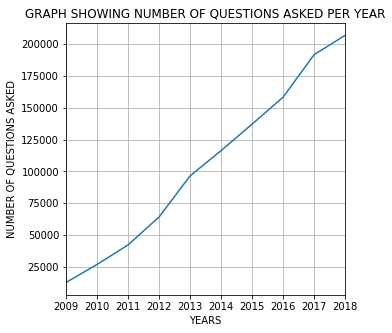

In [20]:
#Question asked in year  we can see that there are more and more python questions asked in trend(2009-2018)
dfyear['year'] = dfyear['date'].apply(lambda x: x.year)
series = dfyear.year.value_counts().sort_index()
#print(dfyear.resample('AS').sum().to_period('A'))
series.plot(figsize=(5,5), grid=True)
plt.xlabel("YEARS")
plt.ylabel("NUMBER OF QUESTIONS ASKED")
plt.title("GRAPH SHOWING NUMBER OF QUESTIONS ASKED PER YEAR")
plt.show()

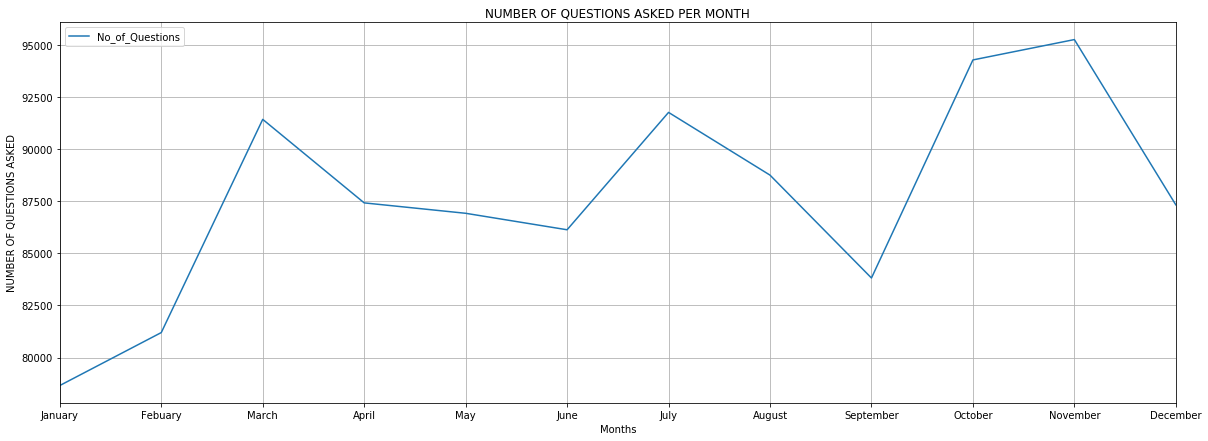

In [21]:
#Question asked in month and see which month have most python questions(2009-2018)
#we found it interesting that in March and July and November there are increase of question we guess it was a lot of students use python
# and it is time for them to finish project and January is the lowest maybe they go back home to enjoy spring festival...
look_up = ["January",
          "Febuary",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]
monthname = pd.Series( (v for v in look_up) )
monthname.index += 1
dfyear['Month'] = dfyear['date'].apply(lambda x: x.month)
series = dfyear.Month.value_counts().sort_index()
month_wise_data = pd.concat([monthname, series], axis=1)
month_wise_data.rename(columns={0:'Months'}, inplace=True)
month_wise_data.rename(columns={'Month':'No_of_Questions'}, inplace=True)
ax = month_wise_data.plot(figsize=(20,7),grid=True)
ax.set_xticks(month_wise_data.index)
ax.set_xticklabels(month_wise_data.Months)
plt.title("NUMBER OF QUESTIONS ASKED PER MONTH")
plt.xlabel("Months")
plt.ylabel("NUMBER OF QUESTIONS ASKED")
plt.show()

In [22]:
df.sort_values("votes",ascending=False,inplace=True)
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305006,39434084,Regular expression for separating strings,-7,2,47,'\r\n I have the following string\r...,python regex,2016-09-11
1305005,39532534,Why does Python call both functions?,-7,2,35,'\r\n I have some problems to under...,python,2016-09-16
1305004,39585895,"""whats wrong with my code? countconsonant""",-7,2,47,'\r\n def countConsonant (s):\n\n ...,python,2016-09-20
1305003,39756447,Generic Pythonic Code to Solve: 2**2**2**2**0 ...,-7,3,79,'\r\n I got the python code below t...,python generics python-3û5,2016-09-28


In [23]:
#We can see the 10 most votes (high quality) python question 
df.head(10).questions

0                    What does the “yield” keyword do?
1     Does Python have a ternary conditional operator?
2             What does if __name__ == “__main__”: do?
3                      What are metaclasses in Python?
4    How do I check whether a file exists without e...
5              Calling an external command from Python
6    How do I merge two dictionaries in a single ex...
7          How can I safely create a nested directory?
8    "Does Python have a string contains substring ...
9              How do I list all files of a directory?
Name: questions, dtype: object

C:\Users\gcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


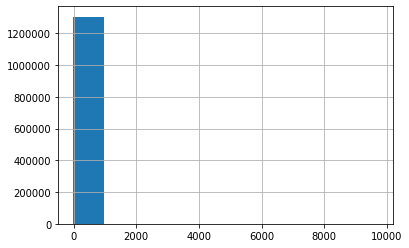

In [24]:
#We can see nearly all the questions are less than 1000 votes we consider more than 1000 is high votes questions
df["votes"].hist().get_figure().show()

In [25]:
df

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
1305006,39434084,Regular expression for separating strings,-7,2,47,'\r\n I have the following string\r...,python regex,2016-09-11
1305005,39532534,Why does Python call both functions?,-7,2,35,'\r\n I have some problems to under...,python,2016-09-16
1305004,39585895,"""whats wrong with my code? countconsonant""",-7,2,47,'\r\n def countConsonant (s):\n\n ...,python,2016-09-20
1305003,39756447,Generic Pythonic Code to Solve: 2**2**2**2**0 ...,-7,3,79,'\r\n I got the python code below t...,python generics python-3û5,2016-09-28


In [119]:
dftag=df["questionstag"].str.split(' ', expand=True)

In [120]:
dftag = dftag.stack()
dftag

0        0        python
         1      iterator
         2     generator
         3         yield
         4     coroutine
                 ...    
1305004  0        python
1305003  0        python
         1      generics
         2    python-3û5
1305236  0        python
Length: 4080356, dtype: object

In [121]:
dftag = dftag.reset_index(level=1, drop=True)

In [122]:
dftag=dftag.value_counts()
dftag=dftag.sort_values(ascending=False)
dftag.drop('python',axis=0,inplace=True)

In [123]:
dftag1=dftag.head(10)
dftag2=dftag.head(500)
dftag1

python-3ûx    118355
pandas        111274
django        108514
numpy          60300
python-2û7     60071
list           41012
matplotlib     36671
dataframe      31250
dictionary     28703
regex          26161
dtype: int64

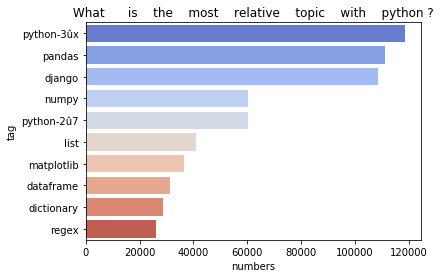

In [169]:
#Here we show the python's most 10 related question tag,pandas is really popular
dict_dftag = {'tag':dftag1.index,'numbers':dftag1.values}
df_tag = pd.DataFrame(dict_dftag)
ax = sns.barplot(x=df_tag.numbers, y=df_tag.tag,data=df_tag,palette="coolwarm").set_title(" What      is    the    most    relative    topic    with    python ? ")

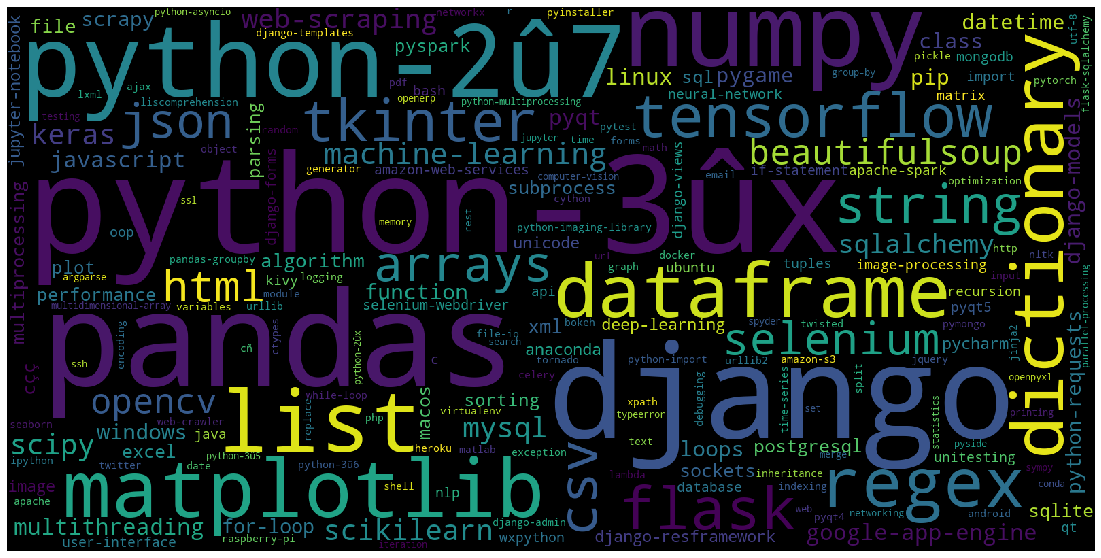

In [126]:
#Also show the most related tag as wordcloud
dict_dftag2 = {'tag':dftag2.index,'numbers':dftag2.values}
df_tag2 = pd.DataFrame(dict_dftag2)
dic = dict(zip(df_tag2['tag'], df_tag2['numbers']))
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=200,
                            relative_scaling=.5).generate_from_frequencies(dic)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('stackOverflowQuestionTitle.png')
plt.imshow(cloud)

In [128]:
#Since we aready know that most of the question votes less than 1000. We select those very high votes questions and analyse
dfhighvote=df[df["votes"]>1000]

In [129]:
dfhighvote

,id,questions,votes,answers,views,questionsbody,questionstag,date
0,231767,What does the “yield” keyword do?,9712,38,2122124,"""\r\n What is the use of the yield ...",python iterator generator yield coroutine,2008-10-23
1,394809,Does Python have a ternary conditional operator?,5639,23,1806936,'\r\n If Python does not have a ter...,python operators ternary-operator conditional-...,NaT
2,419163,What does if __name__ == “__main__”: do?,5597,29,2636793,'\r\n What does the if __name__ == ...,python namespaces main python-module idioms,2009-01-07
3,100003,What are metaclasses in Python?,5443,16,753627,'\r\n What are metaclasses and what...,python oop metaclass python-datamodel,2008-09-19
4,82831,How do I check whether a file exists without e...,5321,37,3732357,'\r\n How do I see if a file exists...,python file file-exists,2008-09-17
...,...,...,...,...,...,...,...,...
128,2998215,"If Python is interpreted, what are .pyc files?",1022,9,475442,'\r\n I\'ve been given to understan...,python compiled interpreted-language pyc,2010-06-08
129,354883,How do I return multiple values from a functio...,1016,14,1110073,'\r\n The canonical way to return m...,python coding-style return return-value,2008-12-10
131,1952464,"In Python, how do I determine if an object is ...",1009,20,416858,"""\r\n Is there a method like isiter...",python iterable,2009-12-23
130,1534210,Use different Python version with virtualenv,1009,28,680956,'\r\n I have a Debian system curren...,python virtualenv virtualenvwrapper,2009-10-07


In [131]:
#using sapcy in text cleaning
spacy_nlp = spacy.load('en_core_web_sm')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords.add("/")
spacy_stopwords.add("=")
spacy_stopwords.add(">")
spacy_stopwords.add("<")
spacy_stopwords.add("#")

customize_stop_words = [
    '/', '=','>','<','#','`','|','}','{','¦',';'
    
]
for w in customize_stop_words:
    spacy_nlp.vocab[w].is_stop = True

In [136]:
titleWords = []
i = 0
for word in dfhighvote.questions:
    word = word.replace(".","").replace(",","").replace(":","").replace("\"","").replace("!","").replace("?","").replace("_","").replace("*","").replace("-","").replace("'","").replace("]","").replace("[","").replace(")","").replace("(","")
    doc = spacy_nlp(word.lower())
    tokens = [token.text for token in doc if not token.is_stop]
    titleWords= titleWords + tokens

word_counter = Counter(titleWords)

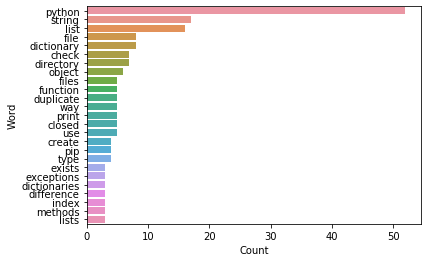

In [140]:
lst = word_counter.most_common(27)
lst1 = word_counter.most_common(202)
df13 = pd.DataFrame(lst, columns = ['Word', 'Count'])
df14 = pd.DataFrame(lst1, columns = ['Word', 'Count'])
df13=df13.drop([8])
df13=df13.drop([9])
df14=df14.drop([8])
df14=df14.drop([9])
#we  can see the high vote question are usually related with ------
ax = sns.barplot(x="Count", y="Word", data=df13)

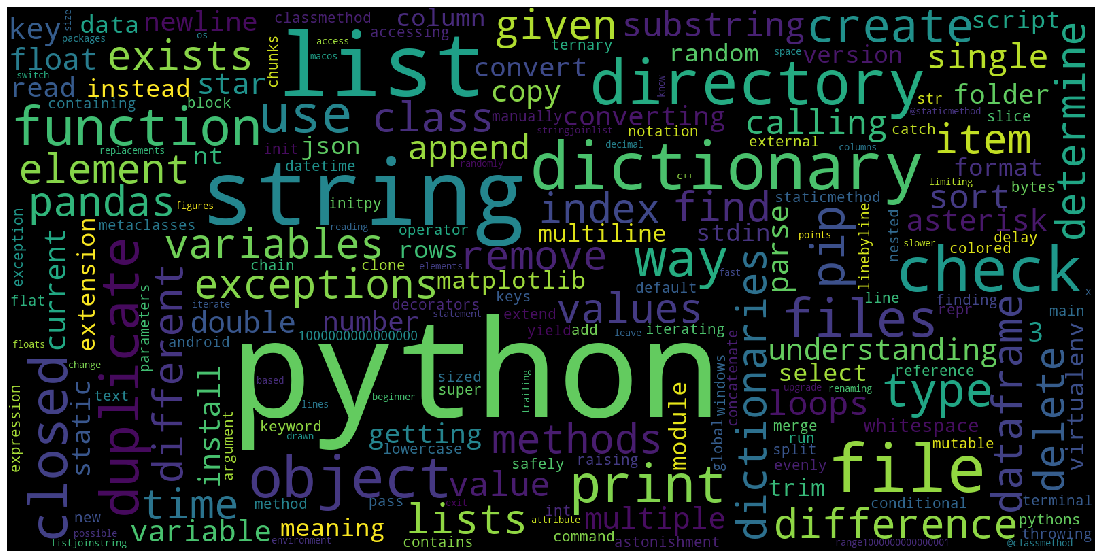

In [141]:
#Same we generate the most 200 related words with high vote question ,so how to ask a high quality python question?
#Maybe Using python to store string in a list and store dictionary in file and check?
dic = dict(zip(df14['Word'], df14['Count']))
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=200,
                            relative_scaling=.5).generate_from_frequencies(dic)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('stackOverflowQuestionTitle.png')
plt.imshow(cloud)

In [142]:
#analyse do time contribute to votes?
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date
10329,469,How can I find the full path to a font from it...,39,4,2869,"""\r\n I am using the Photoshop's ja...",tags t-python t-macos t-fonts t-photoshop,2008-08-02
5344,337,XML Processing in Python closed,68,12,7926,"""\r\n I am about to build a piece o...",tags t-python t-xml,2008-08-02
9782,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,'\r\n I have a cross-platform (Pyth...,tags t-python t-windows t-image t-pdf,2008-08-02
6687,535,Continuous Integration System for a Python Cod...,56,7,8825,'\r\n I am starting to work on a ho...,tags t-python t-continuous-integration t-extre...,2008-08-02
11575,766,Python and MySQL,35,6,3107,'\r\n I can get Python to work with...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03
...,...,...,...,...,...,...,...,...
1226312,59384009,Python ModuleNotFound urllib2,-1,0,24,"""\r\n I am currently running Python...",tags t-python t-python-3ûx,2019-12-18
1226313,59383978,How to simplify program PYTHON closed,-1,0,24,'\r\n I have an assignment where I ...,tags t-python t-simplify,2019-12-18
1226315,59383945,Go to next page when webscraping Google,-1,1,29,'\r\n I am trying to web scrape the...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18
1226316,59383832,how to pass arguments to stats models formula ...,-1,0,9,'\r\n is it possible to pass argume...,tags t-python t-parameter-passing t-formula t-...,2019-12-18


In [165]:
#calculate the question released time as 'Day'
Start=pd.datetime(2019,12,18)
day=pd.Series((Start-Time).days for Time in pd.to_datetime(dfdate["date"]))
dfdate['Day']=day
dfdate=dfdate.reset_index(drop=True)
#today = date(2018, 6, 23)
#dfdate['days_diff'] = (dfdate['date'] - today).apply(lambda x: x.days)

In [166]:
dfdate

,id,questions,votes,answers,views,questionsbody,questionstag,date,Day
0,469,How can I find the full path to a font from it...,39,4,2869,"""\r\n I am using the Photoshop's ja...",tags t-python t-macos t-fonts t-photoshop,2008-08-02,4155
1,337,XML Processing in Python closed,68,12,7926,"""\r\n I am about to build a piece o...",tags t-python t-xml,2008-08-02,4155
2,502,Get a preview JPEG of a PDF on Windows?,41,3,14157,'\r\n I have a cross-platform (Pyth...,tags t-python t-windows t-image t-pdf,2008-08-02,4155
3,535,Continuous Integration System for a Python Cod...,56,7,8825,'\r\n I am starting to work on a ho...,tags t-python t-continuous-integration t-extre...,2008-08-02,4155
4,766,Python and MySQL,35,6,3107,'\r\n I can get Python to work with...,tags t-python t-mysql t-postgresql t-bpgsql,2008-08-03,4154
...,...,...,...,...,...,...,...,...,...
1304680,59384009,Python ModuleNotFound urllib2,-1,0,24,"""\r\n I am currently running Python...",tags t-python t-python-3ûx,2019-12-18,0
1304681,59383978,How to simplify program PYTHON closed,-1,0,24,'\r\n I have an assignment where I ...,tags t-python t-simplify,2019-12-18,0
1304682,59383945,Go to next page when webscraping Google,-1,1,29,'\r\n I am trying to web scrape the...,tags t-python t-python-3ûx t-web-scraping t-be...,2019-12-18,0
1304683,59383832,how to pass arguments to stats models formula ...,-1,0,9,'\r\n is it possible to pass argume...,tags t-python t-parameter-passing t-formula t-...,2019-12-18,0


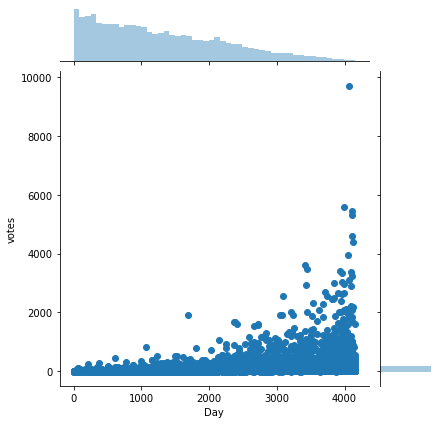

In [167]:
#we can see that the older question seems have more high votes
sns.jointplot(x ='Day', y = 'votes', data = dfdate)

In [168]:
#The correlation coefficient shows that they really have weak correlation  0.1< x<0.3
dfdate.votes.corr(dfdate.Day)

0.11320800248694295

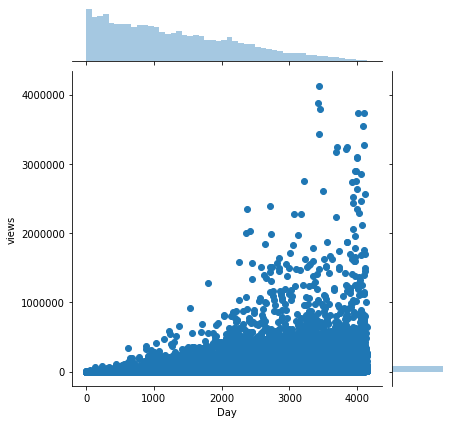

In [171]:

sns.jointplot(x ='Day', y = 'views', data = dfdate)

In [174]:
dfdate.views.corr(dfdate.Day)

0.12710813527798398

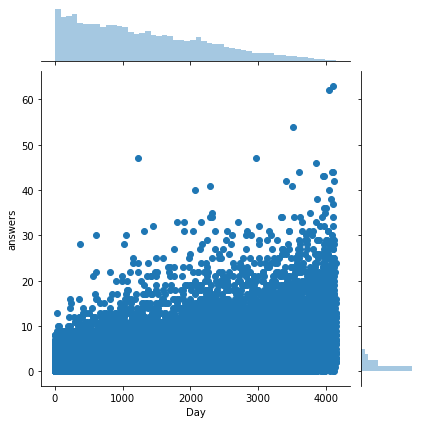

In [173]:
sns.jointplot(x ='Day', y = 'answers', data = dfdate)

In [175]:
dfdate.answers.corr(dfdate.Day)

0.3063262972917076

In [189]:
#sns.jointplot(x = 'answers', y = 'votes', data = df ,kind = 'kde')

In [178]:
#We random sample some of the data 
dfsample=df.sample(n=2000,random_state=123,axis=0)

In [188]:
#sns.jointplot(x = 'answers', y = 'votes', data = dfsample ,kind = 'kde')

In [186]:
#dfsample1=dfdate.sample(n=2000,random_state=123,axis=0)
#sns.jointplot(x = 'Day', y = 'views', data = dfsample ,kind = 'kde',space=0, color="g")

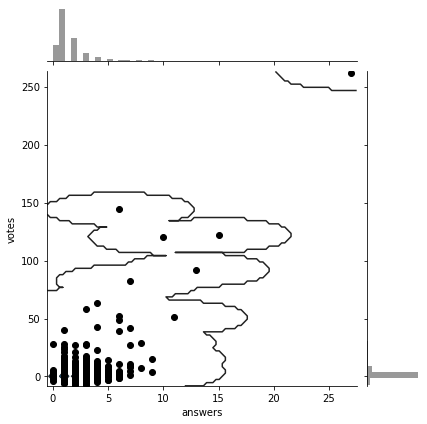

In [185]:
#seems that answer and votes and also related
g = (sns.jointplot("answers", "votes",
                   data=dfsample, color="k")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=10))
plt.show()


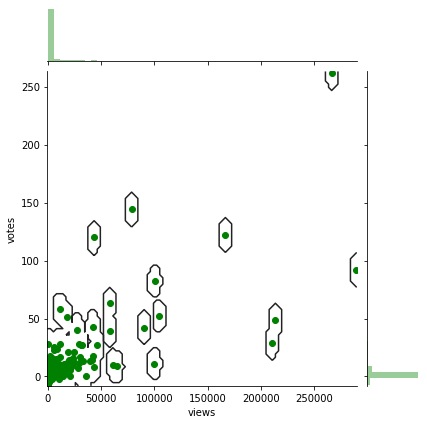

In [190]:
g = (sns.jointplot("views", "votes",
                   data=dfsample, color="g")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=10))
plt.show()

In [191]:
df.votes.corr(df.views)

0.8089030156284096

In [192]:
df.votes.corr(df.answers)

0.3178890897713148

In [ ]:
#Doing the AI prediction part